# FEM Notes

The goal here is to take notes and play around with basic formulations of the Finite Element Method on functions we know how to solve.

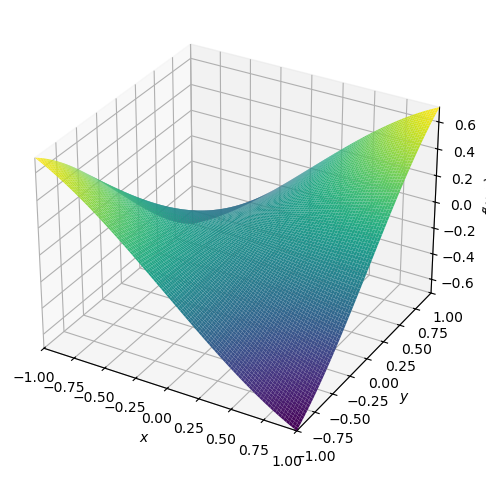

In [1]:
import sympy as sp
from sympy.plotting import plot3d

def f(x, y):
    return sp.sin(x)*sp.sin(y)

x, y = sp.symbols('x y', real=True)

# Demo Function
plot3d(f(x, y), (x, -1, 1), (y, -1, 1))

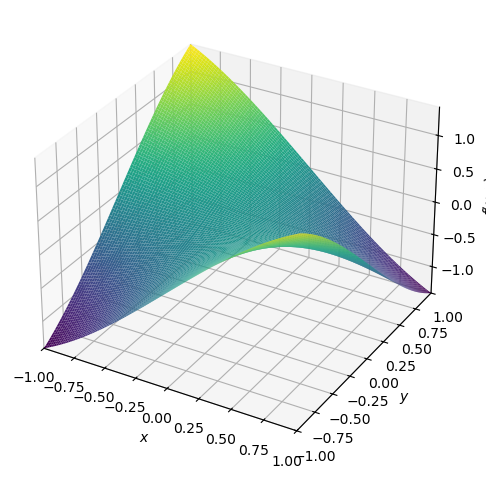

In [2]:
# We can easily find the gradients of this function, to make this easier to visualize, we with visualize the divergence

def div_f(x, y):
    return f(x, y).diff(x, 2) + f(x, y).diff(y, 2)

plot3d(div_f(x, y), (x,-1,1), (y,-1,1))

In [34]:
# Now we assume we didn't know the original function f(x, y)

# Can we solve for u(x, y) through FEM
# u'(x, y) = f'(x, y)

# We start by assuming that u(x, y) = sum u_ij (n_ij(x, y))
# Then u'(x, y) = sum u_ij n_ij'(x, y)
# So
# sum u_ij n_ij'(x, y) = f'(x, y)

# Here we will let the computer handle all of the tedious algebra

from spb import *

def n(i, j, x, y, dx, dy):
    return sp.Piecewise((0.0, x < i-dx), (0.0,x>i+dx), ((x-i+dx)/dx,(i>=x) & (x>=i-dx)), ((x-i-dx)/dx, (i+dx>=x) & (x>i))) * \
           sp.Piecewise((0.0, y < j-dy), (0.0,y>j+dy), ((y-j+dy)/dy,(j>=y) & (y>=j-dy)), ((y-j-dy)/dy, (j+dy>=y) & (y>j)))

n(1, 1, 0.5, 0.5, 1, 1)

x, y = sp.symbols('x y')
plot3d(n(1, 1, x, y, 1, 1), (x,0, 2), (y, 0, 2), backend=PB)


ModuleNotFoundError: No module named 'spb'

In [13]:
sp.Piecewise?

Init signature: sp.Piecewise(*_args)
Docstring:     
Represents a piecewise function.

Usage:

  Piecewise( (expr,cond), (expr,cond), ... )
    - Each argument is a 2-tuple defining an expression and condition
    - The conds are evaluated in turn returning the first that is True.
      If any of the evaluated conds are not explicitly False,
      e.g. ``x < 1``, the function is returned in symbolic form.
    - If the function is evaluated at a place where all conditions are False,
      nan will be returned.
    - Pairs where the cond is explicitly False, will be removed and no pair
      appearing after a True condition will ever be retained. If a single
      pair with a True condition remains, it will be returned, even when
      evaluation is False.

Examples

>>> from sympy import Piecewise, log, piecewise_fold
>>> from sympy.abc import x, y
>>> f = x**2
>>> g = log(x)
>>> p = Piecewise((0, x < -1), (f, x <= 1), (g, True))
>>> p.subs(x,1)
1
>>> p.subs(x,5)
log(5)

Booleans can co

In [4]:
!conda install sympy_plot_backends 

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/dihydromonoxide/Projects/PythonProjects/miniforge3/envs/sympy

  added / updated specs:
    - sympy_plot_backends


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    appdirs-1.4.4              |     pyhd8ed1ab_1          14 KB  conda-forge
    contourpy-1.3.3            |  py314h9891dd4_3         292 KB  conda-forge
    fonttools-4.60.1           |     pyh7db6752_0         809 KB  conda-forge
    gmpy2-2.2.1                |  py314h28848ee_2         210 KB  conda-forge
    kiwisolver-1.4.9           |  py314h97ea11e_2          76 KB  conda-forge
    libblas-3.11.0             |1_h4a7c